In [1]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib qt

# Needed to load the .ims LEICA microscope file
import h5py

In [2]:
def load_ims(fname):
    '''
    This function loads the .ims imaris image of the leica confocal microscope.
    '''
    # load .ims file into an h5py group
    f = h5py.File(fname, 'r')
    
    # Unpacking data into 3d images (one per channel)
    im_cancer = np.array(f['DataSet/ResolutionLevel 0/TimePoint 0/Channel 0'].get('Data'))
    im_cyto = np.array(f['DataSet/ResolutionLevel 0/TimePoint 0/Channel 1'].get('Data'))
    im_bf = np.array(f['DataSet/ResolutionLevel 0/TimePoint 0/Channel 2'].get('Data'))
    im_nuclei = np.array(f['DataSet/ResolutionLevel 0/TimePoint 0/Channel 3'].get('Data'))
    
    # Repacks data into a 4d image
    im4d = np.array([im_cancer, im_cyto, im_nuclei, im_bf])
    
    return im4d

# loading the leica data
im4d = load_ims('data/leica_prostate_cell_scan.ims')

(-0.5, 1023.5, 1023.5, -0.5)

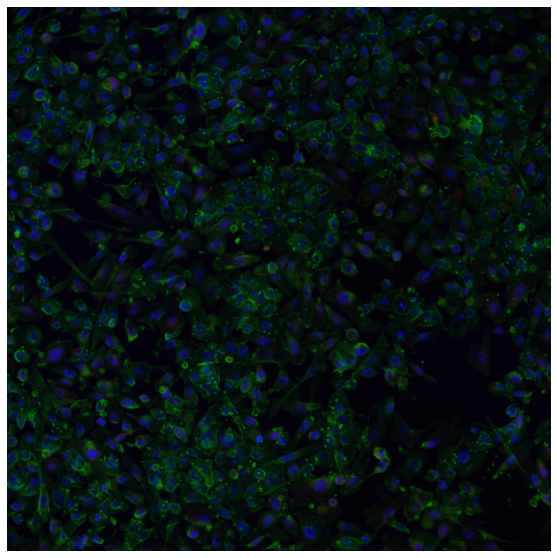

In [3]:
imr = im4d[0, :,:,:].sum(axis=0)
img = im4d[1, :,:,:].sum(axis=0)
imb = im4d[2, :,:,:].sum(axis=0)
im = np.stack([imr,img,imb], axis=2)

plt.figure(figsize=[10,10])
plt.imshow(im/im.max())
plt.axis('off')

(-0.5, 1023.5, 1023.5, -0.5)

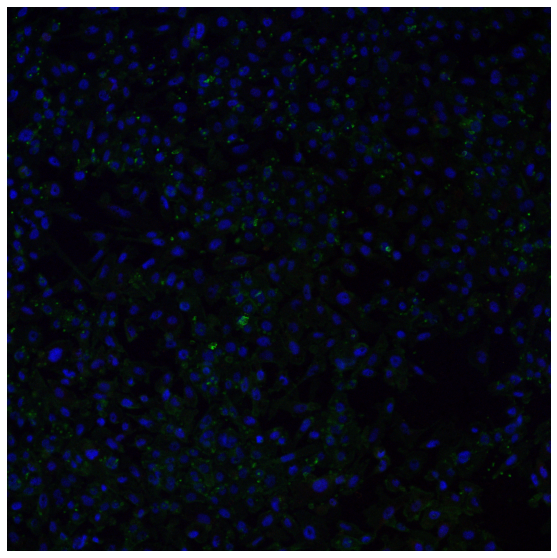

In [4]:
zslice = 5
imr = im4d[0, zslice,:,:]
img = im4d[1, zslice,:,:]
imb = im4d[2, zslice,:,:]
im = np.stack([imr,img,imb], axis=2)

plt.figure(figsize=[10,10])
plt.imshow(im/im.max())
plt.axis('off')

Now let's see how to look at a single nuclei. For instance, let's look at the nuclei at (x=325, y=190).

Text(0, 0.5, 'y')

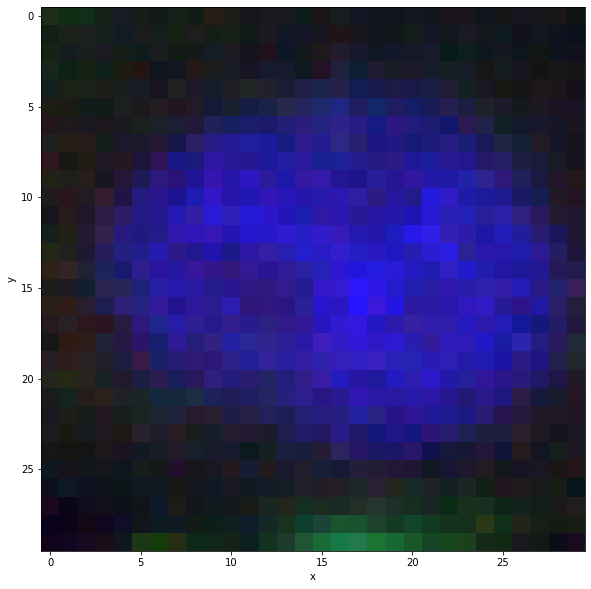

In [5]:
imr = 2*im4d[0, :, 175:205, 310:340].sum(axis=0)
img = im4d[1, :, 175:205, 310:340].sum(axis=0)
imb = im4d[2, :, 175:205, 310:340].sum(axis=0)
im = np.stack([imr,img,imb], axis=2)


plt.figure(figsize=[10,10])
plt.imshow(im/im.max())
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

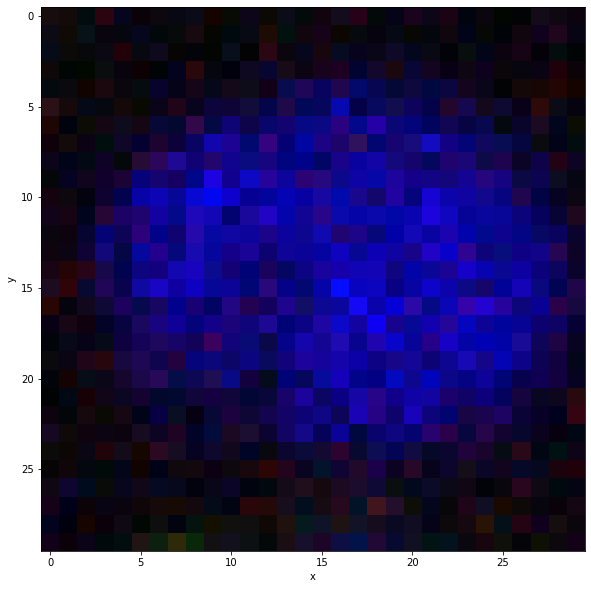

In [6]:
zlayer = 5
imr = 2*im4d[0, zlayer, 175:205, 310:340]
img = im4d[1, zlayer, 175:205, 310:340]
imb = im4d[2, zlayer, 175:205, 310:340]
im = np.stack([imr,img,imb], axis=2)


plt.figure(figsize=[10,10])
plt.imshow(im/im.max())
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'z')

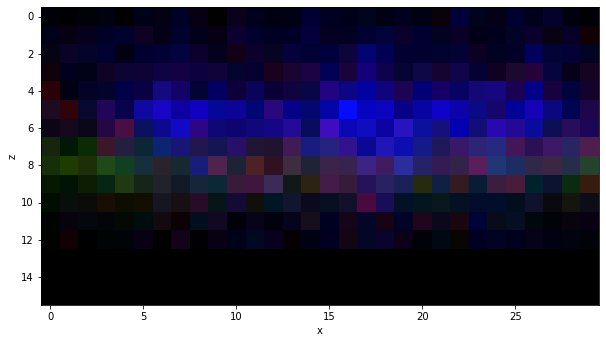

In [7]:
x = range(310, 340)
ylayer = 190
imr = 2*im4d[0, :, ylayer, x].T
img = im4d[1, :, ylayer, x].T
imb = im4d[2, :, ylayer, x].T
im = np.stack([imr,img,imb], axis=2)


plt.figure(figsize=[10,10])
plt.imshow(im/im.max())
plt.xlabel('x')
plt.ylabel('z')

Text(0, 0.5, 'z')

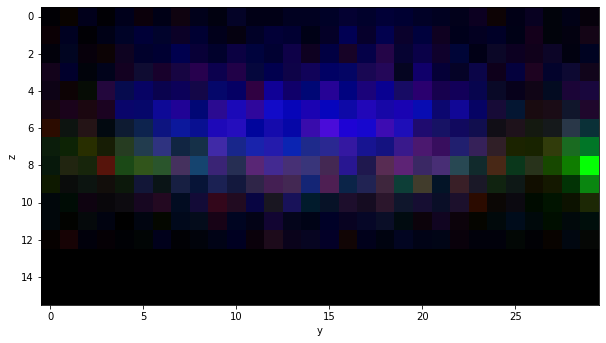

In [8]:
x = range(310, 340)
xlayer = 325
y = range(175, 205)
imr = 2*im4d[0, :, y, xlayer].T
img = im4d[1, :, y, xlayer].T
imb = im4d[2, :, y, xlayer].T
im = np.stack([imr,img,imb], axis=2)


plt.figure(figsize=[10,10])
plt.imshow(im/im.max())
plt.xlabel('y')
plt.ylabel('z')